In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.facecolor'] = 'white'
from scipy.optimize import newton
import astropy.units as u
from datetime import date
today=date.today()
DATE =today.strftime("%m_%d_%y")


In [2]:

# Constants
G = 6.67430e-11                # gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.98847e30             # solar mass (kg)
M_jup = 1.898e27               # Jupiter mass (kg)
day = 86400                    # seconds in a day


In [3]:
rv_df  = pd.read_csv('rv_df.csv')
table4 = pd.read_csv('table4.csv')

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import newton

# # Constants
# G = 6.67430e-11                # gravitational constant (m^3 kg^-1 s^-2)
# M_sun = 1.98847e30             # solar mass (kg)
# M_jup = 1.898e27               # Jupiter mass (kg)
# day = 86400                    # seconds in a day

# # Inputs
# P_day = 20.
# P = P_day * day                  # orbital period in seconds
# e = 0.25                        # eccentricity
# M2sini = 15.0 * M_jup           # companion mass (M*sin i)
# M1 = 1.03 * M_sun               # mass of the star
# omega = 0.0                     # argument of periastron (rad)
# T0 = 0.0                        # time of periastron

# # Time array
# t = np.linspace(0, P, 500)
# t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# # Compute semi-amplitude K
# K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s

# print(K/1000.)
# K = -110*1000
# # Kepler's Equation solver
# def kepler_eq(E, M, e):
#     return E - e * np.sin(E) - M

# # Compute RV curve
# vr = []
# for ti in t:
#     M = 2 * np.pi * (ti - T0) / P
#     E = newton(kepler_eq, M, args=(M, e))
#     nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
#                         np.sqrt(1 - e) * np.cos(E / 2))
#     v = K * (np.cos(nu + omega) + e * np.cos(omega))
#     vr.append(v)

# vr = np.array(vr)
# vr_kms = np.array(vr)/1000.
# # Plot
# plt.plot(t / day, vr_kms)
# plt.scatter(time - min(time), rv)
# plt.xlabel('Time [days]')
# plt.ylabel('Radial Velocity [km/s]')
# plt.title('Simulated RV Curve')
# plt.grid()
# plt.show()


##  Simulate curve for a given P & e (hard corded):

In [5]:

# # Inputs
# P_day        = 20.
# P            = P_day * day                 # orbital period in seconds
# e            = 0.0                         # eccentricity
# M2sini       = 15.0 * M_jup           # companion mass (M*sin i)
# M1           = 1.03 * M_sun               # mass of the star
# phi0         = 0.0                        # time of periastron
# v0_kms       = -117. #km/s
# v0           = v0_kms*1000
                

# # Time array
# t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# # Calculate semi-amplitude K
# K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
# K = 1.13*1000

# # Kepler's equation solver
# def kepler_eq(E, M, e):
#     return E - e * np.sin(E) - M

# def sample_omega(omega):
#     # omega: argument of periastron (rad)
    
#     # Compute RV curve
#     vr = []
#     for ti in t:
#         M = 2 * np.pi * (ti - phi0) / P
#         E = newton(kepler_eq, M, args=(M, e))
#         nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
#                             np.sqrt(1 - e) * np.cos(E / 2))
#         v = K * (np.cos(nu + omega) + e * np.cos(omega))
#         vr.append(v)

#     vr = np.array(vr) + v0
#     vr_kms = np.array(vr)/1000. 
    
#     return vr_kms


# omegas = np.linspace(0, 1, 20)
# plt.figure(figsize=(14,14))
# for i,omega in enumerate(omegas):
#     plt.subplot(5, 4, i+1)
#     vr_kms = sample_omega(omega)
    
#     # Plot
#     plt.plot(t / day, vr_kms)
#     plt.scatter(time - min(time), rv)
#     plt.xlabel('Time [days]')
#     plt.ylabel('Radial Velocity [km/s]')
#     plt.title('Simulated RV Curve')
#     plt.grid()
# plt.tight_layout()
# plt.savefig('../plots/plota.png',bbox_inches='tight',dpi=200)
# plt.show()


##  Simulate curve for a range of P & e:

In [6]:
# # Inputs
# e            = 0.0                        # eccentricity
# # M2sini       = 15.0 * M_jup             # companion mass (M*sin i)
# M1           = 1.03 * M_sun               # mass of the star
# phi0         = 0.0                        # time of periastron
# v0_kms       = -117. #km/s
# v0           = v0_kms*1000
                
# # Time array
# t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# # Kepler's equation solver
# def kepler_eq(E, M, e):
#     return E - e * np.sin(E) - M

# def sample_omega(K,omega, P):
#     # omega: argument of periastron (rad)
    
#     # Compute RV curve
#     vr = []
#     for ti in t:
#         M = 2 * np.pi * (ti - phi0) / P
#         E = newton(kepler_eq, M, args=(M, e))
#         nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
#                             np.sqrt(1 - e) * np.cos(E / 2))
#         v = K * (np.cos(nu + omega) + e * np.cos(omega))
#         vr.append(v)

#     vr = np.array(vr) + v0
#     vr_kms = np.array(vr)/1000. 
    
#     return vr_kms

# # Calculate semi-amplitude K
# def get_K_amp(P, M2sini):
#     K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
#     return K

# omega  = 0
# P_day  = np.logspace(0, 1.4, 5)
# P      = P_day * day                          # orbital period in seconds
# M2sini = np.logspace(0, 3, 10)*M_jup         # companion mass (M*sin i)
# Ps,Ms  = np.meshgrid(P, M2sini)

# coordinates = np.vstack((Ps.ravel(), Ms.ravel())).T
# print(len(coordinates))
# plt.figure(figsize=(12,25))

# for i, coord in enumerate(coordinates):

#     P_i, M2sini_i = coord
#     K             = get_K_amp(P_i, M2sini_i)
#     vr_kms        = sample_omega(K,omega, P_i)
    
#     # Plot
#     ax = plt.subplot(10,5,i+1)
#     plt.plot(t / day, vr_kms, lw=0.4)
#     plt.scatter(time - min(time), rv,c='C1')
#     #plt.xlabel('Time [days]')
#     #plt.ylabel('Radial Velocity [km/s]')
#     s = 'P=%i day \n M2sini = %.1f MJ \n e=%.2f' % (P_i/day, M2sini_i/M_jup, e)
#     plt.text(0.95, 0.05, s, ha='right', va='bottom', transform=ax.transAxes)
# #     if i % 5 != 0: 
# #         ax.tick_params(axis='both', left=False, labelleft=False)
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)

#     plt.grid()
# plt.subplots_adjust(wspace=0.4)
# # plt.savefig('../plots/plotb_e=%.2f.png'%e,bbox_inches='tight',dpi=200)
# plt.close()


In [7]:
# # Inputs
# e            = 0.0                        # eccentricity
# # M2sini       = 15.0 * M_jup             # companion mass (M*sin i)
# M1           = 1.03 * M_sun               # mass of the star
# phi0         = 0.0                        # time of periastron
# v0_kms       = -117. #km/s
# v0           = v0_kms*1000
                
# # Time array
# t = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

# # Kepler's equation solver
# def kepler_eq(E, M, e):
#     return E - e * np.sin(E) - M

# def sample_omega(K,omega, P):
#     # omega: argument of periastron (rad)
    
#     # Compute RV curve
#     vr = []
#     for ti in t:
#         M = 2 * np.pi * (ti - phi0) / P
#         E = newton(kepler_eq, M, args=(M, e))
#         nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
#                             np.sqrt(1 - e) * np.cos(E / 2))
#         v = K * (np.cos(nu + omega) + e * np.cos(omega))
#         vr.append(v)

#     vr = np.array(vr) + v0
#     vr_kms = np.array(vr)/1000. 
    
#     return vr_kms

# # Calculate semi-amplitude K
# def get_K_amp(P, M2sini):
#     K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
#     return K

# P_day  = np.logspace(0, 1.4, 3)
# P      = P_day * day                          # orbital period in seconds
# M2sini = np.logspace(0, 2, 4)*M_jup         # companion mass (M*sin i)
# omega  = np.linspace(0, 0.99, 3)

# # Generate the 3D meshgrid
# Ps,Ms,ws = np.meshgrid(P, M2sini, omega)

# coordinates = np.vstack((Ps.ravel(), Ms.ravel(), ws.ravel())).T
# coordinates

# print(len(coordinates))
# plt.figure(figsize=(15,12))

# for i, coord in enumerate(coordinates):

#     P_i, M2sini_i, omega_i = coord
#     K             = get_K_amp(P_i, M2sini_i)
#     vr_kms        = sample_omega(K,omega_i, P_i)
    
#     # Plot
#     ax = plt.subplot(6,6,i+1)
#     plt.plot(t / day, vr_kms, lw=0.4)
#     plt.scatter(time - min(time), rv,c='C1',zorder=100)
#     #plt.xlabel('Time [days]')
#     #plt.ylabel('Radial Velocity [km/s]')
#     s = 'P=%i day \n M2sini = %.1f MJ \n w = %.1f' % (P_i/day, M2sini_i/M_jup, omega_i)
#     plt.text(0.95, 0.05, s, ha='right', va='bottom', transform=ax.transAxes)
# #     if i % 5 != 0: 
# #         ax.tick_params(axis='both', left=False, labelleft=False)
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)

#     plt.grid()
# plt.tight_layout()
# # plt.subplots_adjust(wspace=0.4)
# # plt.savefig('../plots/plotc_e=%.2f.png'%e,bbox_inches='tight',dpi=200)
# plt.close()


## Define grid of period and masses:

In [21]:

P_day  = np.logspace(0, np.log10(365*10.), 100)
P      = P_day * day                          # orbital period in seconds
M2sini = np.logspace(0, 3, 50)*M_jup         # companion mass (M*sin i)
Ps,Ms  = np.meshgrid(P, M2sini)

# omegas = np.linspace(0, 2*np.pi, 3)


## Stellar parameters:

In [9]:
from astropy.table import Table

galah_vac = Table.read('../../lithium/data/GALAH_DR3_VAC_ages_v2.fits').to_pandas()
rv_df     = pd.read_csv('rv_df.csv')
comb_df   = pd.read_csv('combined_rvs.csv')


In [10]:
# Inputs
# e            = 0.0                        # eccentricity
# # M2sini       = 15.0 * M_jup             # companion mass (M*sin i)
# M1           = 1.03 * M_sun               # mass of the star
# phi0         = 0.0                        # time of periastron

# time         = np.array([2460474.57198915 , 2460435.75850621,  2460499.67428951,  2460455.62586687, 2460516.54010265])
# rv           = np.array([-117.83011489 , -117.71543337 , -116.5371912 ,  -117.48537324 ,  -117.24155665])
# rv_err       = np.array([0.04487504, 0.03975618, 0.04247364, 0.04613382, 0.0412279 ])

# t            = np.linspace(0, max(time)-min(time), 500) * 86400. # in seconds

binary_list_113 = [9, 11, 16, 18, 19, 23,] # old: 1, 4, 5, 7, 9, 11, 16, 18, 19, 21, 23  
binary_list_112 = [6, 23] #old: 5, 6, 7, 23 #13 removed because of dipper star

def clean_up(df):
    galah_id = df.sobject_id.values[0]
    dtemp    = comb_df[comb_df.GALAH_ID==galah_id]
    
    time = dtemp['time'].to_numpy()
    rv   = dtemp['rv'].to_numpy()
    err  = dtemp['rv_err'].to_numpy()
    source  = dtemp['source'].to_numpy()
    
    return time, rv, err, source, dtemp

def read_star_data(program, obj):
    dtemp  = rv_df[(rv_df.RG_id==obj) & (rv_df.program==program)]
    merged = pd.merge(dtemp, galah_vac[['sobject_id','m_act_bstep','e_m_act_bstep','radius_bstep','e_radius_bstep']], left_on='sobject_id', right_on='sobject_id')
    M1     = merged.m_act_bstep.values[0]
    logg   = merged.logg.values[0]
    time, rv, err, _, _ = clean_up(dtemp)
    baseline   = max(time)-min(time)
    #print('baseline: %i days' % baseline)
    time_grid  = np.linspace(0, baseline, 500) * 86400. # in seconds
    
    return M1, logg, time_grid, time, rv, err

    

## Helper functions:

In [11]:

# Kepler's equation solver
def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def sample_omega_phi0(time_grid, K, omega, phi0, P, e):
    # omega: argument of periastron (rad)
    
    # Compute RV curve
    vr = []
    for ti in time_grid:
        M = 2 * np.pi * (ti - phi0) / P
        E = newton(kepler_eq, M, args=(M, e))
        nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                            np.sqrt(1 - e) * np.cos(E / 2))
        v = K * (np.cos(nu + omega) + e * np.cos(omega))
        vr.append(v)

    vr     = np.array(vr) #+ v0
    vr_kms = np.array(vr)/1000. 
    
    return vr_kms

# Calculate semi-amplitude K
def get_K_amp(P, M2sini, M1, e):
    K = ((2 * np.pi * G / P)**(1./3)) * (M2sini) / ((M1 + M2sini)**(2./3)) / np.sqrt(1. - e**2)  # in m/s
    return K


## Sum over omega:

In [12]:
def average_omega(scatter_per_omega):
    # Initialize a sum array with the first array's values
    summed_over_omega = np.copy(scatter_per_omega[0])

    # Loop through the remaining arrays and add them element-wise
    for i in range(1, len(scatter_per_omega)):
        summed_over_omega += scatter_per_omega[i]

    averaged_over_omega = summed_over_omega/len(scatter_per_omega)
    return averaged_over_omega


## Loop through omegas:

## Pipeline:

In [64]:
def semi_log(y1, x2, y2, x, x1=0):
    b = np.log10(y1)
    m = (1./x2)*np.log10(y2/y1)
    y = 10**(m*x+b)
    return y

In [65]:
def rule_out(averaged_over_omega, threshold):
    mask     = (averaged_over_omega >= threshold)
    result = np.copy(averaged_over_omega)
    result[mask] = np.nan
    return result

In [83]:
# Time array
def loop_over_omega_phi0(M1, time_grid,omega_phi0_coords, e):

    scatter_per_omega = []
    
    for i,coord in enumerate(omega_phi0_coords):
        omega_i, phi0_i = coord
        
        Ks        = get_K_amp(Ps, Ms, M1, e)


        # shape of vr_kms: ( len(time_grid), Msini, P )
        vr_kms    = sample_omega_phi0(time_grid, Ks, omega_i, phi0_i,  Ps, e) 
        # vr_kms returns RV amplitude (N=time_grid length) over a grid of Ms and Ps (so 3D)
        # so each M and P value would return N RV values where N is the length of time grid
        
        # the following finds the max and min of RV list for this specific omega and phi0
        max_rv = np.nanmax(vr_kms, axis=0)
        min_rv = np.nanmin(vr_kms, axis=0)
        
        semi_amp  = (max_rv - min_rv)/2. #np.nanstd(vr_kms, axis=0)
        
        # this saves the semi-amp 2D grid (which is later averaged)
        scatter_per_omega.append(semi_amp)
    
        ''' # plotting 
        
        ax       = plt.subplot(4,3,i+1)
        
        mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, scatter, cmap='Reds')
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Periods [day]')
        plt.ylabel('Msini [Mjup]')
        plt.title('omega = %.2f \t phi0 = %.2f'% (omega_i, phi0_i))
        plt.colorbar(mesh,label='std(RV) [km/s]')
        plt.grid()
        '''

    return scatter_per_omega


In [84]:
omegas = np.linspace(0, 2*np.pi, 25)
phi0s   = np.linspace(0, 2*np.pi, 25)
omegas, phi0s = np.meshgrid(omegas, phi0s)
omega_phi0_coords = np.vstack((omegas.ravel(), phi0s.ravel())).T

def pipeline(program, obj, e):
    M1, logg, time_grid, time, rv, rv_err = read_star_data(program, obj)
    time_grid = time*1
    scatter_per_omega   = loop_over_omega_phi0(M1, time_grid, omega_phi0_coords, e)

    averaged_over_omega = average_omega(scatter_per_omega)
    
    threshold = semi_log(5000, 4.0, 70, logg) #m/s
    threshold /= 1000                         #km/s
    
    print(program, obj,'threshold %.2f km/s' % threshold)
    
    result              = rule_out(averaged_over_omega, threshold)

    #return result
    return scatter_per_omega

result  = pipeline(113, 16, e=0)


113 16 threshold 0.27 km/s


In [31]:
notbin = rv_df[~rv_df.sobject_id.isin(table4.sobject_id)]

In [32]:
def run_all_targets(e):
    result_all_targets = []
    for i, row in notbin.iterrows():
        program, obj = row.program, row.RG_id
        result = pipeline(program, obj, e)
        result_all_targets.append(result)
    
    per_target = np.copy(result_all_targets[0])
    
    # Loop through the remaining arrays and add them element-wise
    for i in range(1, len(result_all_targets)):
        per_target += result_all_targets[i]

    # average the grid for all targets:
    averaged_over_targets = per_target/len(result_all_targets)
    return averaged_over_targets



In [33]:
averaged_over_targets_e0   = run_all_targets(e=0.0)

112 1 threshold 0.74 km/s
112 2 threshold 0.62 km/s
112 4 threshold 0.49 km/s
112 5 threshold 1.13 km/s
112 7 threshold 0.25 km/s
112 14 threshold 0.40 km/s
113 1 threshold 0.72 km/s
113 2 threshold 0.77 km/s
113 3 threshold 1.20 km/s
113 4 threshold 1.10 km/s
113 5 threshold 2.19 km/s
113 6 threshold 0.80 km/s
113 7 threshold 1.02 km/s
113 8 threshold 0.89 km/s
113 10 threshold 0.18 km/s
113 12 threshold 0.28 km/s
113 13 threshold 0.22 km/s
113 14 threshold 0.24 km/s
113 15 threshold 0.21 km/s
113 17 threshold 0.28 km/s
113 20 threshold 0.38 km/s
113 21 threshold 0.29 km/s
113 22 threshold 0.41 km/s
113 24 threshold 0.31 km/s
113 25 threshold 0.43 km/s


In [34]:
averaged_over_targets_e025 = run_all_targets(e=0.25)

112 1 threshold 0.74 km/s
112 2 threshold 0.62 km/s
112 4 threshold 0.49 km/s
112 5 threshold 1.13 km/s
112 7 threshold 0.25 km/s
112 14 threshold 0.40 km/s
113 1 threshold 0.72 km/s
113 2 threshold 0.77 km/s
113 3 threshold 1.20 km/s
113 4 threshold 1.10 km/s
113 5 threshold 2.19 km/s
113 6 threshold 0.80 km/s
113 7 threshold 1.02 km/s
113 8 threshold 0.89 km/s
113 10 threshold 0.18 km/s
113 12 threshold 0.28 km/s
113 13 threshold 0.22 km/s
113 14 threshold 0.24 km/s
113 15 threshold 0.21 km/s
113 17 threshold 0.28 km/s
113 20 threshold 0.38 km/s
113 21 threshold 0.29 km/s
113 22 threshold 0.41 km/s
113 24 threshold 0.31 km/s
113 25 threshold 0.43 km/s


In [35]:
averaged_over_targets_e05  = run_all_targets(e=0.5)

112 1 threshold 0.74 km/s
112 2 threshold 0.62 km/s
112 4 threshold 0.49 km/s
112 5 threshold 1.13 km/s
112 7 threshold 0.25 km/s
112 14 threshold 0.40 km/s
113 1 threshold 0.72 km/s
113 2 threshold 0.77 km/s
113 3 threshold 1.20 km/s
113 4 threshold 1.10 km/s
113 5 threshold 2.19 km/s
113 6 threshold 0.80 km/s
113 7 threshold 1.02 km/s
113 8 threshold 0.89 km/s
113 10 threshold 0.18 km/s
113 12 threshold 0.28 km/s
113 13 threshold 0.22 km/s
113 14 threshold 0.24 km/s
113 15 threshold 0.21 km/s
113 17 threshold 0.28 km/s
113 20 threshold 0.38 km/s
113 21 threshold 0.29 km/s
113 22 threshold 0.41 km/s
113 24 threshold 0.31 km/s
113 25 threshold 0.43 km/s


In [36]:
averaged_over_targets_e09  = run_all_targets(e=0.9)

112 1 threshold 0.74 km/s
112 2 threshold 0.62 km/s
112 4 threshold 0.49 km/s
112 5 threshold 1.13 km/s
112 7 threshold 0.25 km/s
112 14 threshold 0.40 km/s
113 1 threshold 0.72 km/s
113 2 threshold 0.77 km/s
113 3 threshold 1.20 km/s
113 4 threshold 1.10 km/s
113 5 threshold 2.19 km/s
113 6 threshold 0.80 km/s
113 7 threshold 1.02 km/s
113 8 threshold 0.89 km/s
113 10 threshold 0.18 km/s
113 12 threshold 0.28 km/s
113 13 threshold 0.22 km/s
113 14 threshold 0.24 km/s
113 15 threshold 0.21 km/s
113 17 threshold 0.28 km/s
113 20 threshold 0.38 km/s
113 21 threshold 0.29 km/s
113 22 threshold 0.41 km/s
113 24 threshold 0.31 km/s
113 25 threshold 0.43 km/s


In [39]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


2.603861929115046e-05
4.64362206239697e-05
0.00010424023344061306
0.0008527796721148131


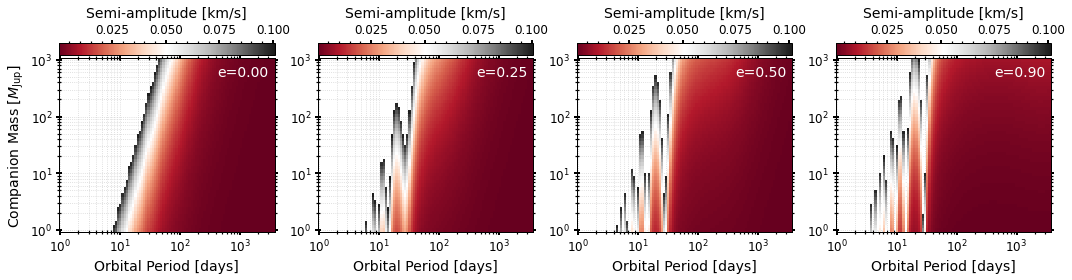

In [92]:
from utils import PLOT_PARAMS
PLOT_PARAMS(LS=14,SIZE=12)
fig = plt.figure(figsize=(15,4))

all_ecc = [averaged_over_targets_e0, averaged_over_targets_e025, averaged_over_targets_e05, averaged_over_targets_e09]
names   = [0, 0.25, 0.50, 0.90]

for i, e_list, name in zip(range(4), all_ecc, names):
    
    ax                  = plt.subplot(1,4,i+1)

    mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, e_list, cmap='RdGy')
    ax.set_xlabel('Orbital Period [days]')
    plt.xscale('log')
    plt.yscale('log')
    ax.text(3000, 800, 'e=%.2f'%name, va='top', ha='right',fontsize=14,color='white')
    print(np.nanmin(e_list))
    # colorbar
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("top", size="7%", pad="2%") # add an axes above the main axes.
    cb = fig.colorbar(mesh, cax=cax, orientation="horizontal")
    cax.xaxis.set_ticks_position("top") # change tick position to top
    cb.ax.set_title('Semi-amplitude [km/s]')
    
    ax.grid(which='both',color='lightgrey',ls='dotted')

    if i ==0: 
        ax.set_ylabel(r'Companion Mass [$M_{\rm Jup}$]')
    

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig('../plots/M_vs_P_%s.png'%DATE, bbox_inches='tight',dpi=150)


In [ ]:
ss

In [ ]:
## plotting

In [ ]:


plt.figure(figsize=(5,4))
ax       = plt.subplot(1,1,1)

mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, result, cmap='Reds')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Periods [day]')
plt.ylabel('Msini [Mjup]')
plt.colorbar(mesh,label='std(RV) [km/s]')
plt.grid()
# plt.savefig('../plots/plot_f.png',bbox_inches='tight',dpi=200)


In [ ]:
ss

## Rule out parameter space:

In [ ]:


plt.figure(figsize=(5,4))
ax       = plt.subplot(1,1,1)

mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, rule_out, cmap='Reds')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Periods [day]')
plt.ylabel('Msini [Mjup]')
plt.colorbar(mesh,label='std(RV) [km/s]')
plt.grid()
# plt.savefig('../plots/plot_f.png',bbox_inches='tight',dpi=200)


In [ ]:
ss

In [ ]:
    
plt.figure(figsize=(5,4))
ax       = plt.subplot(1,1,1)

mesh     = ax.pcolormesh(Ps/day, Ms/M_jup, averaged_over_omega, cmap='Reds')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Periods [day]')
plt.ylabel('Msini [Mjup]')
plt.colorbar(mesh,label='std(RV) [km/s]')
plt.grid()
# plt.savefig('../plots/plotf_all_omega.png',bbox_inches='tight',dpi=200)


In [ ]:
(np.min(scatter_d[0])*u.km/u.s).to(u.m/u.s), (np.mean(rv_err)*u.km/u.s).to(u.m/u.s)

In [ ]:
(np.min(averaged_over_omega)*u.km/u.s).to(u.m/u.s), (np.mean(rv_err)*u.km/u.s).to(u.m/u.s)

In [ ]:

# Assuming `arr` is your original array with shape (500, 50, 30)
arr_mean = np.std(vr_kms, axis=0)

# Resulting shape will be (50, 30)
print(arr_mean.shape)


In [ ]:

# for j, omega_i in enumerate(omegas):
#     scatter_array  = np.zeros_like(Ps)
#     mean_array     = np.zeros_like(Ps)
#     median_array   = np.zeros_like(Ps)
#     for i, coord in enumerate(coordinates):
#         P_idx, M_idx              = indices[i]
#         P_i, M2sini_i             = coord
        
#         K                          = get_K_amp(P_i, M2sini_i)
#         vr_kms                     = sample_omega(K, omega_i, P_i)
#         scatter_array[M_idx,P_idx] = np.std(vr_kms)
#         mean_array[M_idx,P_idx]    = np.mean(vr_kms)
#         median_array[M_idx,P_idx]  = np.median(vr_kms)
        
#     scatter_d[j] = scatter_array
#     mean_d[j]    = mean_array
#     median_d[j]  = median_array
    